In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 


In [4]:
data = pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [5]:
print(f'The Dimension of the above data is {data.shape}' )

The Dimension of the above data is (768, 9)


In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# checking the presence of null values in the data
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Basic EDA and Statiscal analysis

In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
# it only operate with numerical attributes and ignore the categorical attributes but can be called using include = 'all' parameter
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
# most columns have a minimum vcalue of 0 which makes it an absebce of a value ie NaN..
# note pregnancy can have a minimum value of zero
col = data.columns.to_list()
zero_col = []
non_zero = []
for i in col:
  if (data[i].min() == 0)  :
    zero_col.append(i)
  else:
    non_zero.append(i)



zero_col.remove('Outcome')
zero_col.remove('Pregnancies')
print(zero_col)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [12]:
# Replacing the zeros with np.nan values
data_copy = data.copy()
data_copy[zero_col] = data_copy[zero_col].replace(0,np.NaN)

In [13]:
data_copy.isna().sum()/data.shape[0] * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

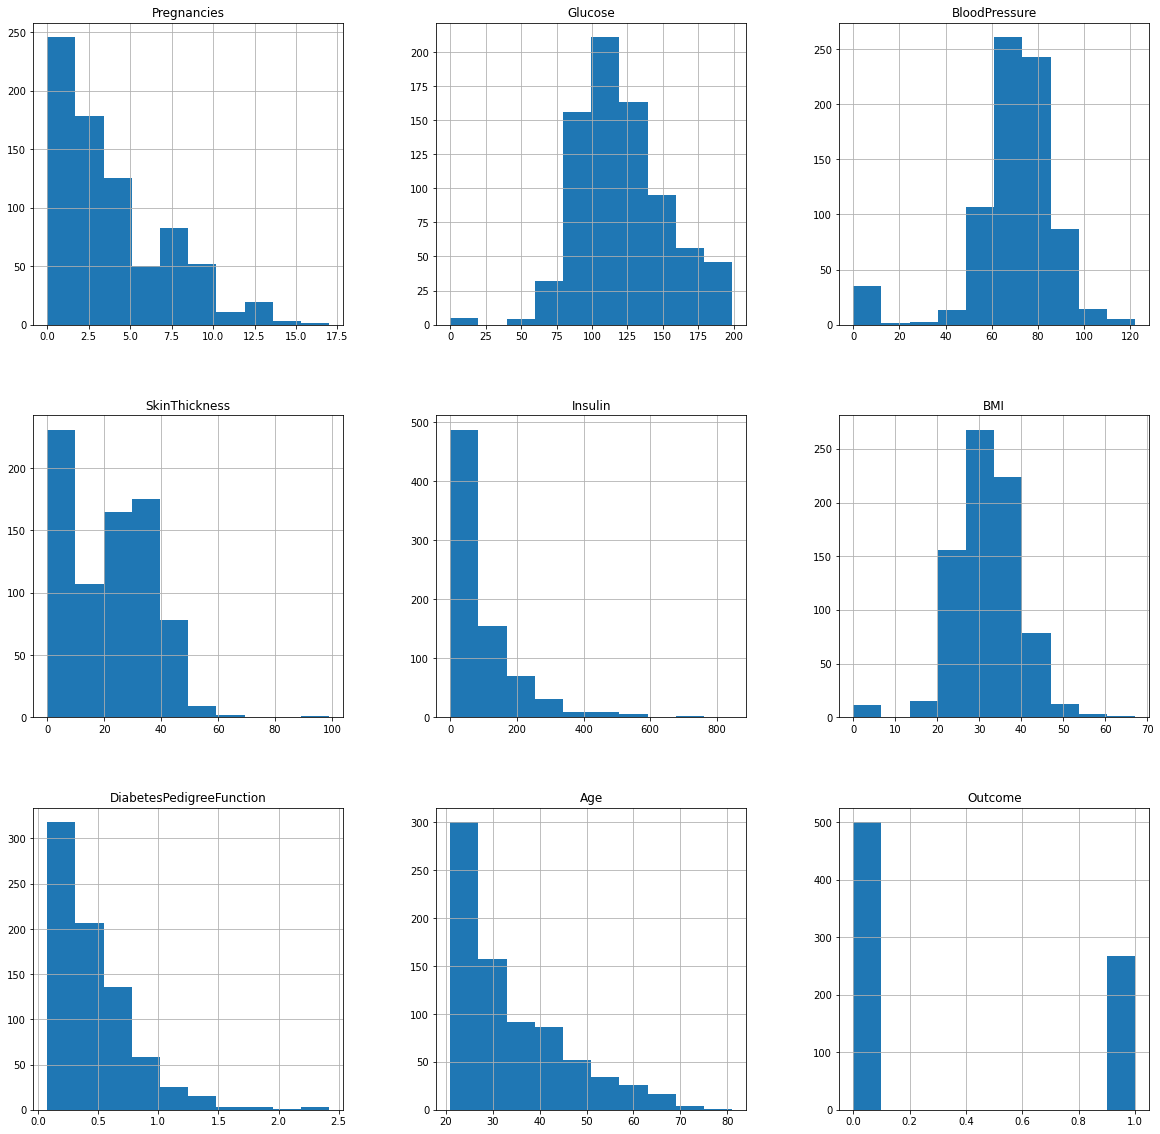

In [14]:
hist = data.hist(figsize = (20,20))

In [15]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].mean(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

In [16]:
data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

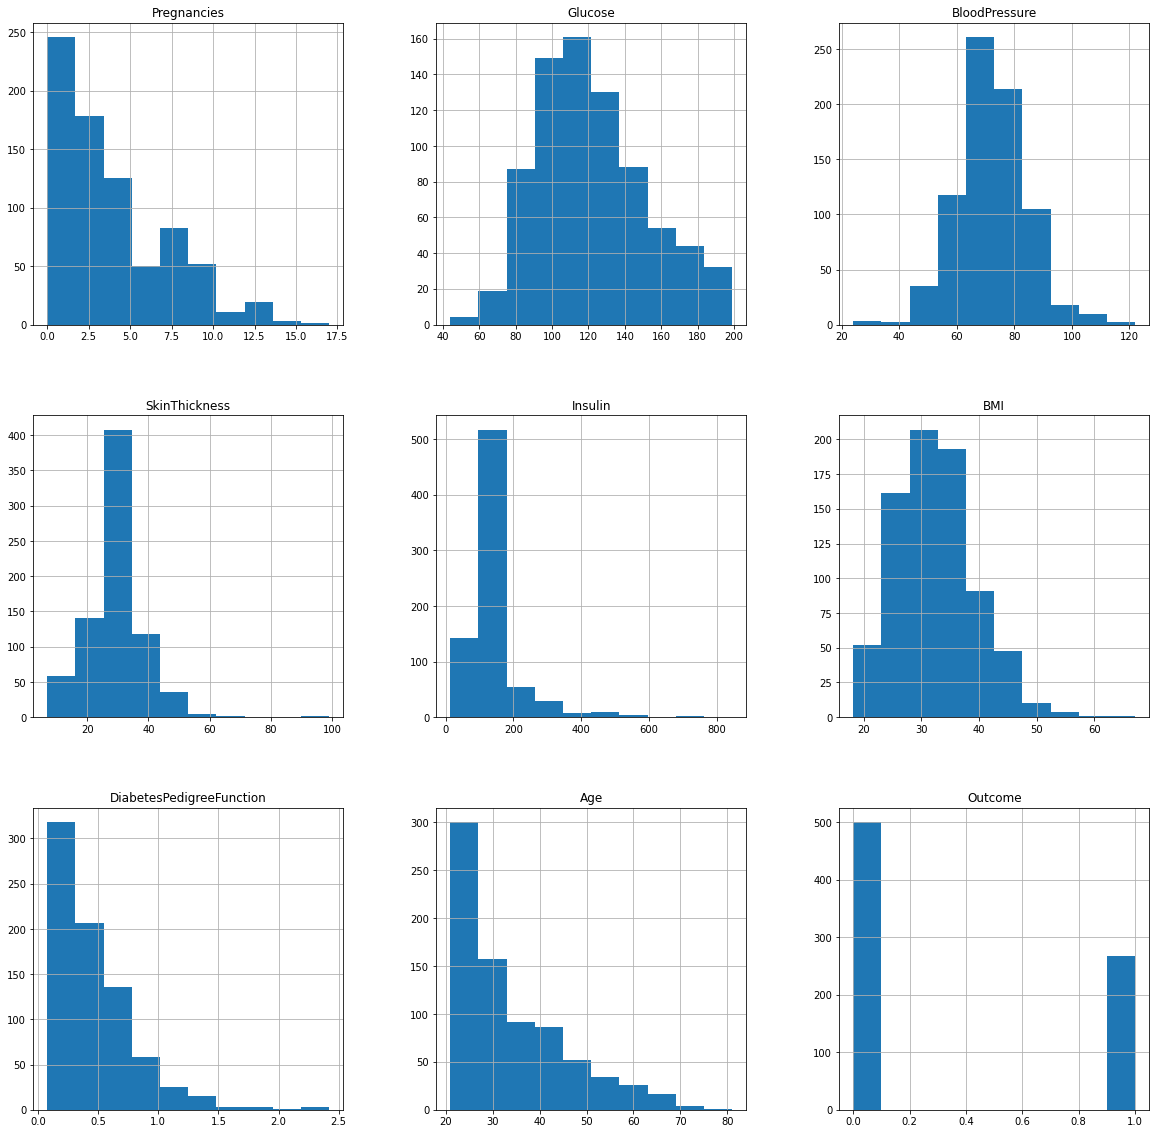

In [17]:
# plotting to check the distribution after imputation
hist_2 = data_copy.hist(figsize= (20,20))

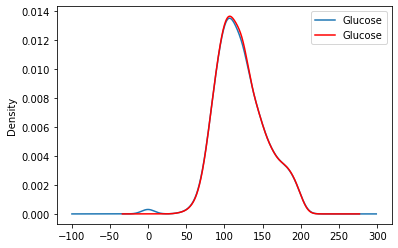

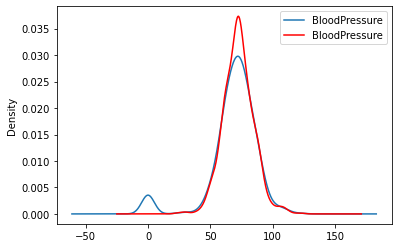

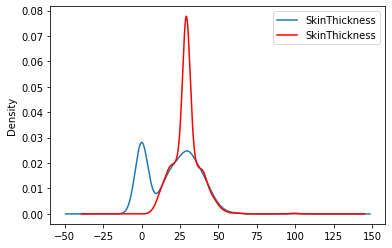

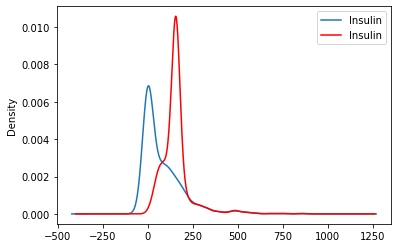

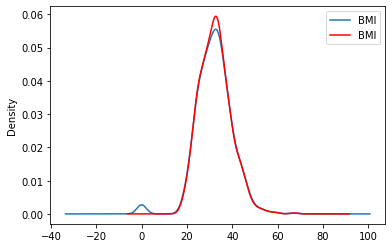

In [18]:
for col in zero_col:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  data[col].plot(kind= 'kde',ax= ax)
  data_copy[col].plot(kind= 'kde',ax= ax, color= 'red')
  lines,labels = ax.get_legend_handles_labels()
  ax.legend(lines,labels,loc = 'best')

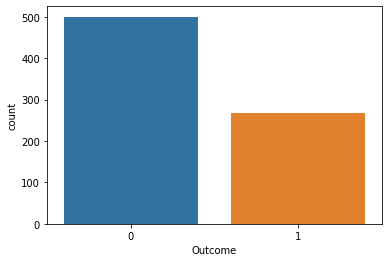

In [53]:
sns.countplot(x='Outcome',data=data)
plt.show()

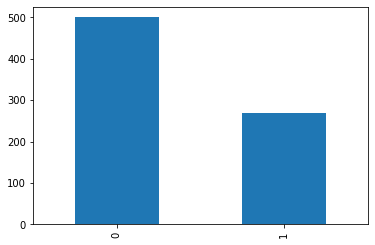

In [19]:
data_copy['Outcome'].value_counts().plot(kind = 'bar')

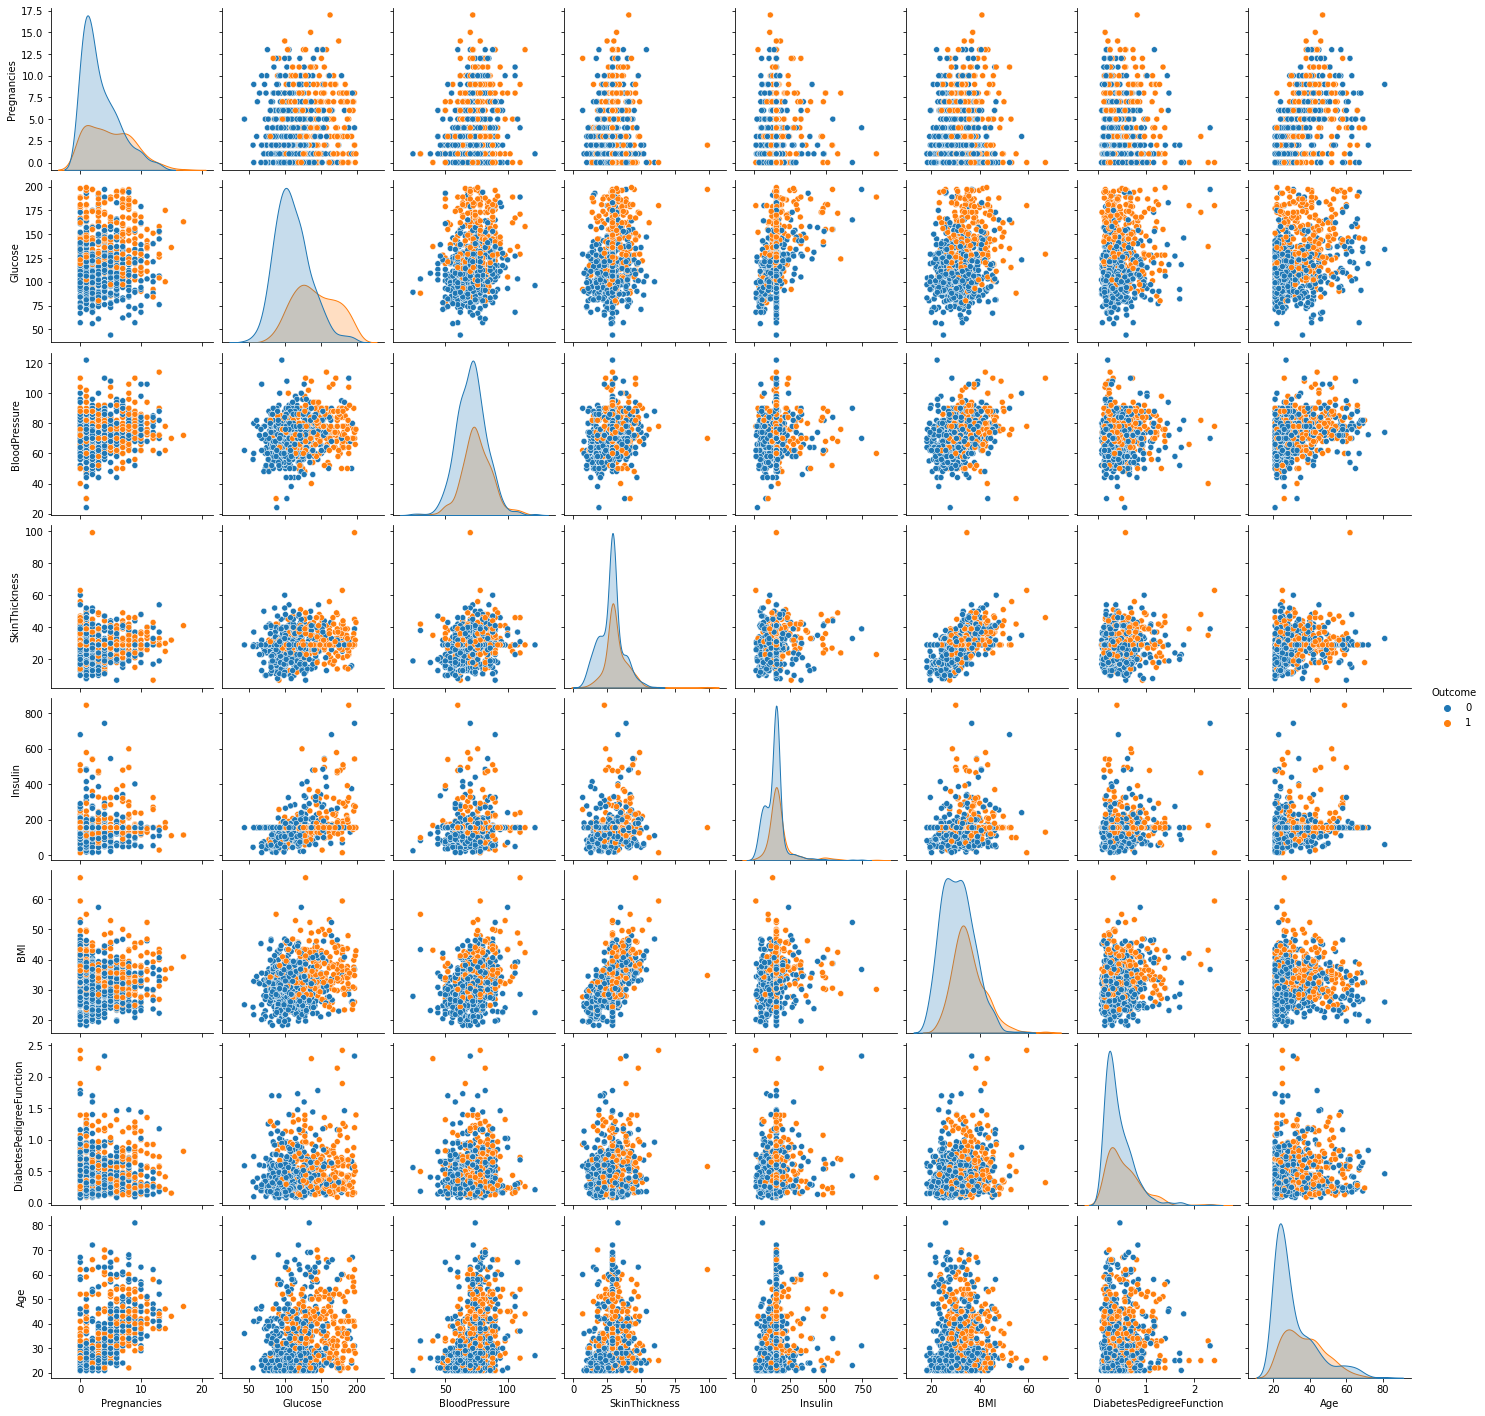

In [20]:
p=sns.pairplot(data_copy, hue = 'Outcome')

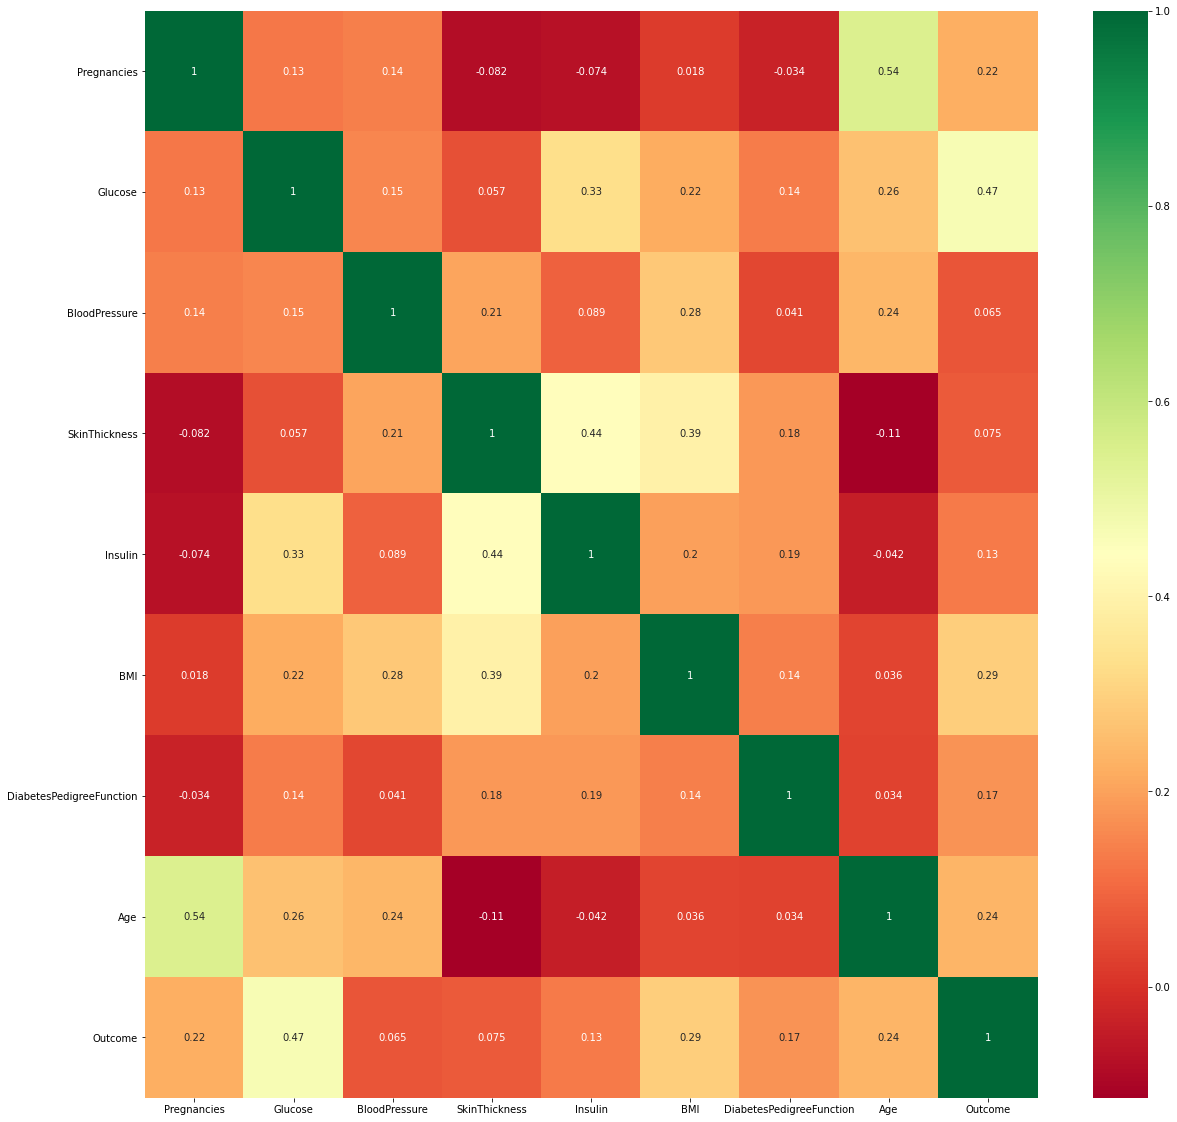

In [21]:
#get correlations of each features in dataset
corr_mat = data.corr()
best_corr = corr_mat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[best_corr].corr(),annot=True,cmap="RdYlGn")

In [22]:
from sklearn.preprocessing import StandardScaler
stand_scale = StandardScaler()
X = stand_scale.fit_transform(data_copy.drop(['Outcome'],axis= 1))
X = pd.DataFrame(X,columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [28]:
y = data_copy['Outcome']

In [29]:
#importing train_test_split
from sklearn.model_selection import train_test_split
# About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as 
# the proportion of values provided to parameter stratify due to the imbalance nature of the outcome
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV


In [31]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()


def base_model(name,model):
  print(name)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  print(classification_report(y_test,prediction))
  print(accuracy_score(y_test,prediction))
  print(confusion_matrix(y_test,prediction))

In [32]:
base_model('logistic reg',lg)
print('.'*150)
base_model('Decision tree',dt)
print('.'*150)
base_model('Random forest',rf)
print('.'*150)
base_model('Extra tree',et)
print('.'*150)
base_model('Gradient boost',gb)

logistic reg
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

0.7402597402597403
[[128  22]
 [ 38  43]]
......................................................................................................................................................
Decision tree
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       150
           1       0.57      0.56      0.56        81

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231

0.696969696969697
[[116  34]
 [ 36  45]]
.....................................................................................

In [56]:
types=['rbf','linear']
for i in types:
    model=SVC(kernel=i)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))
    print(classification_report(y_test,prediction))
    print(accuracy_score(y_test,prediction))
    print(confusion_matrix(y_test,prediction))
    pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy for SVM kernel= rbf is 0.7359307359307359
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.49      0.57        81

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231

0.7359307359307359
[[130  20]
 [ 41  40]]
Accuracy for SVM kernel= linear is 0.7272727272727273
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231

0.7272727272727273
[[129  21]
 [ 42  39]]


In [33]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [34]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {}  and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.75757575757575  and k = [3]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


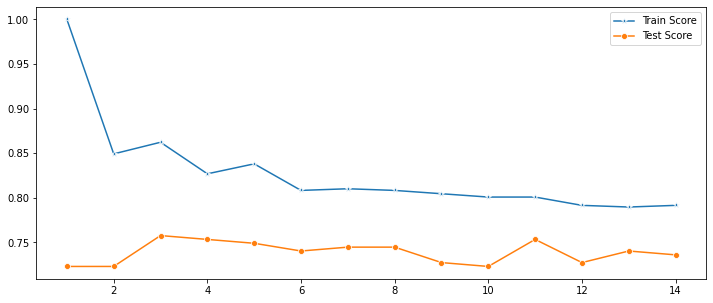

In [35]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [39]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       150
           1       0.67      0.60      0.64        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

0.7575757575757576
[[126  24]
 [ 32  49]]


Predicted,0,1,All
True,,,
0,126,24,150
1,32,49,81
All,158,73,231


Text(0.5, 15.0, 'Predicted label')

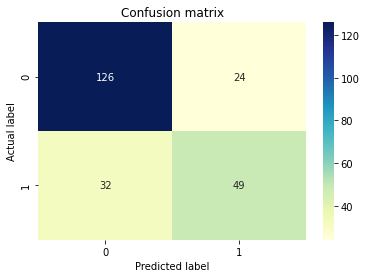

In [40]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

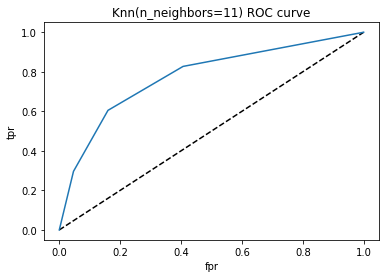

In [41]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [42]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7766666666666666

In [49]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7748153806977337
Best Parameters: {'n_neighbors': 25}


In [57]:
from lightgbm import LGBMClassifier

In [65]:
random_state=42

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': [5,10,15,20,25], 
              'min_child_samples': [100,200,300,400], 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4], 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=4,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X_train, y_train, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = LGBMClassifier(**opt_parameters)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.4min finished


In [69]:
prediction =grid_search.predict(X_test)
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)


              precision    recall  f1-score   support

           0       0.77      0.83      0.80       150
           1       0.63      0.54      0.58        81

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

0.7272727272727273
[[124  26]
 [ 37  44]]


Predicted,0,1,All
True,,,
0,124,26,150
1,37,44,81
All,161,70,231


The best model that gives a good recall and reduces FN false negatives is the knearest  Neighbour